In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set_style('whitegrid')

In [6]:
df=pd.read_csv('kyphosis.csv')

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [10]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


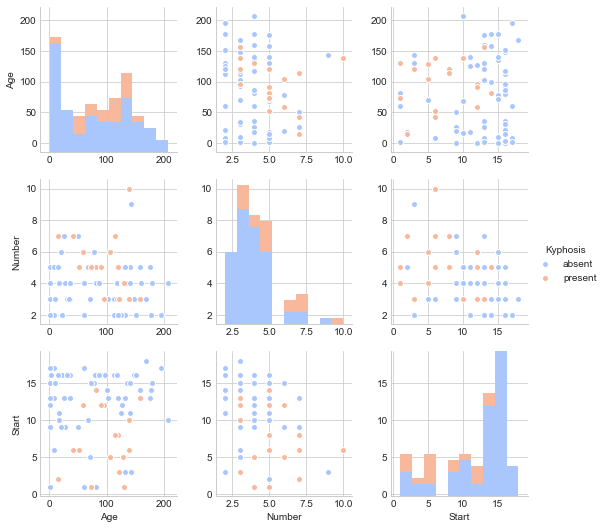

In [16]:
sns.pairplot(df,hue='Kyphosis',palette='coolwarm')

In [17]:
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
from sklearn.tree import DecisionTreeClassifier 

In [26]:
dtree=DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
predictions=dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.95      0.83      0.89        24
    present       0.33      0.67      0.44         3

avg / total       0.88      0.81      0.84        27



[[20  4]
 [ 1  2]]


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier(n_estimators=200)

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
rfc_pred=rfc.predict(X_test)

In [36]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.91      0.88      0.89        24
    present       0.25      0.33      0.29         3

avg / total       0.84      0.81      0.83        27



[[21  3]
 [ 2  1]]


In [37]:
#compare both for better performance 

In [38]:
print(predictions)

['absent' 'absent' 'present' 'present' 'absent' 'absent' 'present' 'absent'
 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'present'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'present']


In [39]:
print(rfc_pred)

['absent' 'absent' 'present' 'present' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'present' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent' 'absent'
 'absent' 'absent' 'present']
